In [1]:
from lblcrn.homogenous_crn.solution import *
from lblcrn.homogenous_crn.sym import *
from lblcrn.homogenous_crn.xps import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

In [2]:
# 1e-6_rt
sols = []
sm = SpeciesManager()

#[535.0 , 532.2 , 530.9 , 530.0 , 531.6 ,  531.6 ,  533.2, 535.0]
#[y1, x2, x3, x4, x53, x54, x6, x7]
y1 = sm.sp('y1', Orbital('1s', 535.0), {0:1.0000})
x2 = sm.sp('x2', Orbital('1s', 532.2), {0:0})
x3 = sm.sp('x3', Orbital('1s', 530.9), {0:0})
x4 = sm.sp('x4', Orbital('1s', 530.0), {0:0.25})
x53 = sm.sp('x53', Orbital('1s', 531.6), {0:0})
x54 = sm.sp('x54', Orbital('1s', 531.6), {0:0})
x6 = sm.sp('x6', Orbital('1s', 533.2), {0:0})
x7 = sm.sp('x7', Orbital('1s', 535.0), {0:0})

multipliers = [0.1, 0.5, 1, 5, 10]
default_rxn_consts = [3.207654, 1.363342, [6.220646, 0.160755], 0.299507, 0.167130, 1.939313, 0.515646, 0.733491, 0.311754, 1.038423, 0.962999, [0.002342,426.922895]]

In [7]:
# Test code that will be moved into a module
for i in range(len(default_rxn_consts)):
    for j in range(5):
        scaled = list(default_rxn_consts)
        if isinstance(scaled[i], list):
            scaled[i][0] *= multipliers[j]
            scaled[i][1] *= multipliers[j]
        else:
            scaled[i] *= multipliers[j]
        
        rsys = RxnSystem(
            Rxn(x4 + y1, x54, scaled[0]),
            Rxn(x3 + y1, x53, scaled[1]),
            RevRxn(x54, x3 + x3, scaled[2]0], scaled[2][1]),
            Rxn(x53, x2 + x3, scaled[3]),
            Rxn(x54, x2 + x4, scaled[4]),
            Rxn(x2, y1, scaled[5]),
            Rxn(y1, x2, scaled[6]),
            Rxn(x53, y1 + x3, scaled[7]),
            Rxn(x54, x4 + y1, scaled[8]),
            Rxn(x53 + y1, x6, scaled[9]),
            Rxn(x6, x53 + y1, scaled[10]),
            RevRxn(x4 + x4, x7, scaled[11][0], scaled[11][1]),
            sm
        )
        s = solve(rsys, time=10000)
        sols.append(s)
        print('Solved for ('+str(i)+', '+str(j)+')')
        print(scaled)
        print('\n')

Solved for (0, 0)
[0.3207654, 1.363342, [6.220646, 0.160755], 0.299507, 0.16713, 1.939313, 0.515646, 0.733491, 0.311754, 1.038423, 0.962999, [0.002342, 426.922895]]


Solved for (0, 1)
[1.603827, 1.363342, [6.220646, 0.160755], 0.299507, 0.16713, 1.939313, 0.515646, 0.733491, 0.311754, 1.038423, 0.962999, [0.002342, 426.922895]]


Solved for (0, 2)
[3.207654, 1.363342, [6.220646, 0.160755], 0.299507, 0.16713, 1.939313, 0.515646, 0.733491, 0.311754, 1.038423, 0.962999, [0.002342, 426.922895]]


Solved for (0, 3)
[16.038269999999997, 1.363342, [6.220646, 0.160755], 0.299507, 0.16713, 1.939313, 0.515646, 0.733491, 0.311754, 1.038423, 0.962999, [0.002342, 426.922895]]


Solved for (0, 4)
[32.076539999999994, 1.363342, [6.220646, 0.160755], 0.299507, 0.16713, 1.939313, 0.515646, 0.733491, 0.311754, 1.038423, 0.962999, [0.002342, 426.922895]]


Solved for (1, 0)
[3.207654, 0.13633420000000002, [6.220646, 0.160755], 0.299507, 0.16713, 1.939313, 0.515646, 0.733491, 0.311754, 1.038423, 0.962999

Solved for (9, 0)
[3.207654, 1.363342, [15.551615000000002, 0.40188750000000006], 0.299507, 0.16713, 1.939313, 0.515646, 0.733491, 0.311754, 0.10384230000000001, 0.962999, [0.002342, 426.922895]]


Solved for (9, 1)
[3.207654, 1.363342, [15.551615000000002, 0.40188750000000006], 0.299507, 0.16713, 1.939313, 0.515646, 0.733491, 0.311754, 0.5192115, 0.962999, [0.002342, 426.922895]]


Solved for (9, 2)
[3.207654, 1.363342, [15.551615000000002, 0.40188750000000006], 0.299507, 0.16713, 1.939313, 0.515646, 0.733491, 0.311754, 1.038423, 0.962999, [0.002342, 426.922895]]


Solved for (9, 3)
[3.207654, 1.363342, [15.551615000000002, 0.40188750000000006], 0.299507, 0.16713, 1.939313, 0.515646, 0.733491, 0.311754, 5.192115, 0.962999, [0.002342, 426.922895]]


Solved for (9, 4)
[3.207654, 1.363342, [15.551615000000002, 0.40188750000000006], 0.299507, 0.16713, 1.939313, 0.515646, 0.733491, 0.311754, 10.38423, 0.962999, [0.002342, 426.922895]]


Solved for (10, 0)
[3.207654, 1.363342, [15.551615000

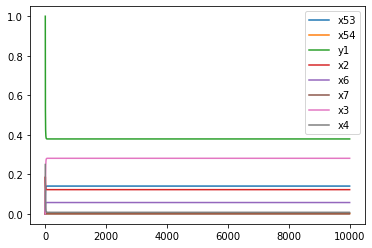

In [5]:
sols[0].basic_plot()

Const: 0 Multiplier: 0.1


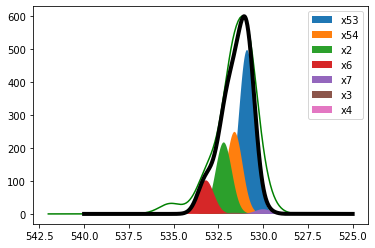

Const: 0 Multiplier: 0.5


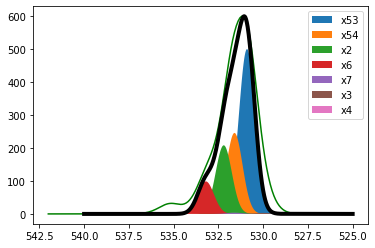

Const: 0 Multiplier: 1


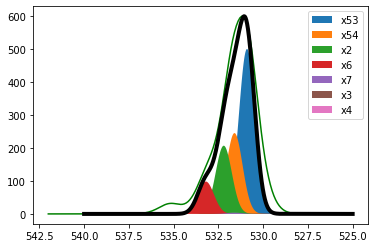

Const: 0 Multiplier: 5


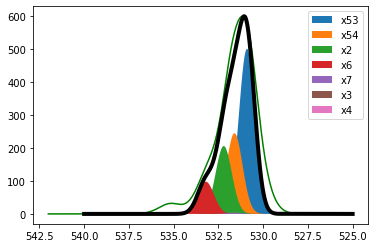

Const: 0 Multiplier: 10


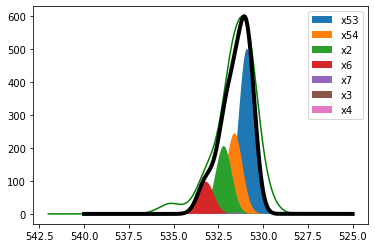

Const: 1 Multiplier: 0.1


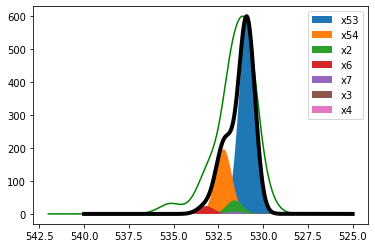

Const: 1 Multiplier: 0.5


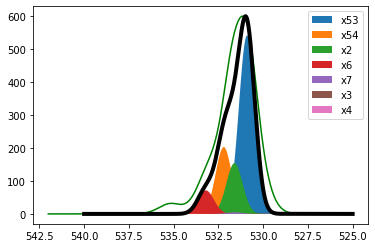

Const: 1 Multiplier: 1


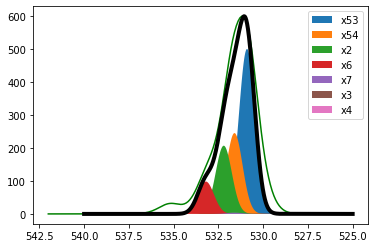

Const: 1 Multiplier: 5


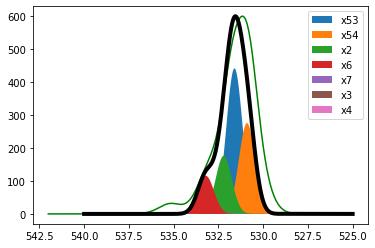

Const: 1 Multiplier: 10


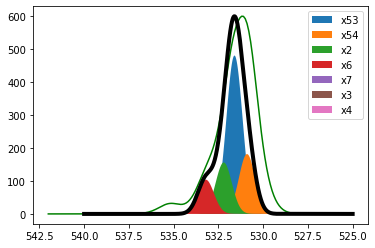

Const: 2 Multiplier: 0.1


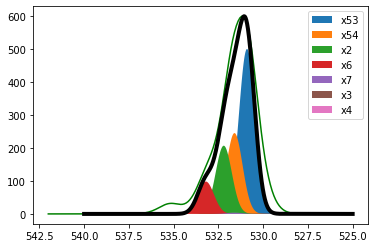

Const: 2 Multiplier: 0.5


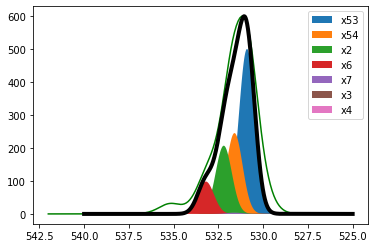

Const: 2 Multiplier: 1


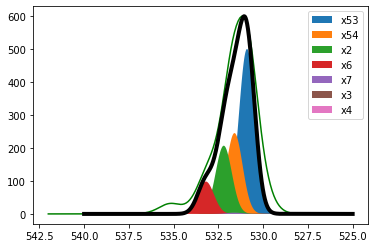

Const: 2 Multiplier: 5


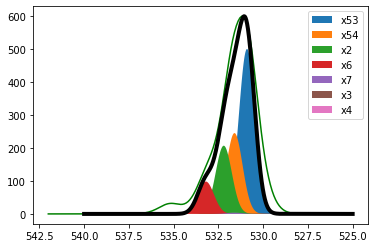

Const: 2 Multiplier: 10


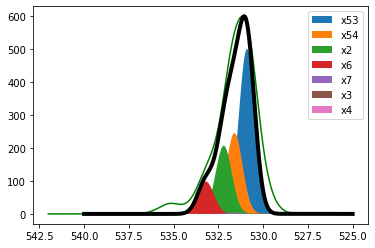

Const: 3 Multiplier: 0.1


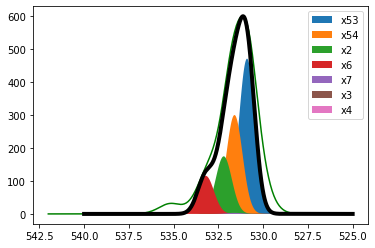

Const: 3 Multiplier: 0.5


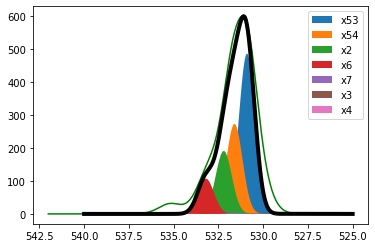

Const: 3 Multiplier: 1


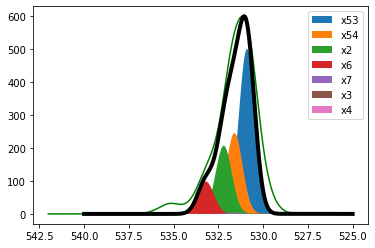

Const: 3 Multiplier: 5


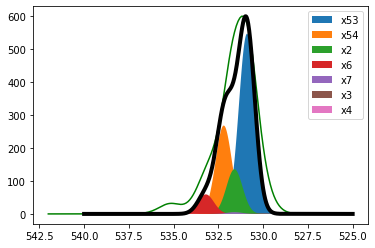

Const: 3 Multiplier: 10


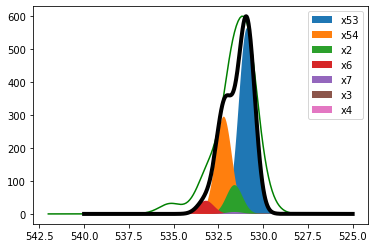

Const: 4 Multiplier: 0.1


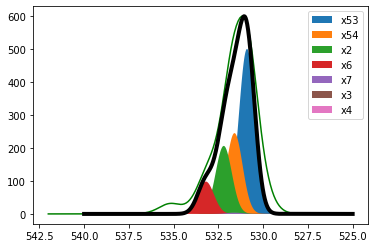

Const: 4 Multiplier: 0.5


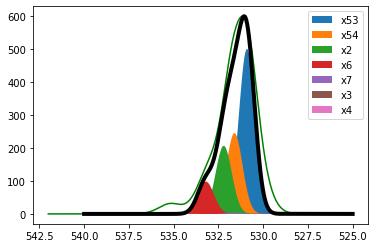

Const: 4 Multiplier: 1


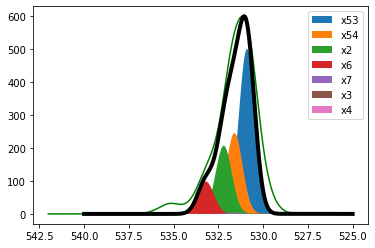

Const: 4 Multiplier: 5


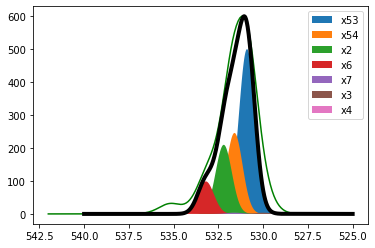

Const: 4 Multiplier: 10


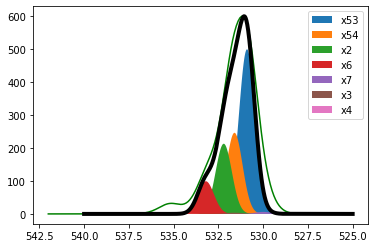

Const: 5 Multiplier: 0.1


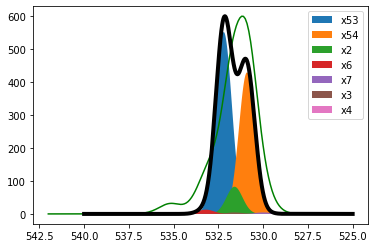

Const: 5 Multiplier: 0.5


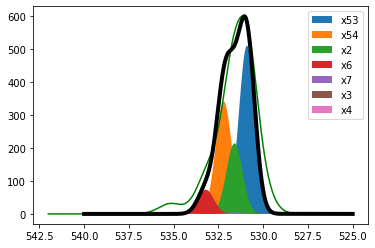

Const: 5 Multiplier: 1


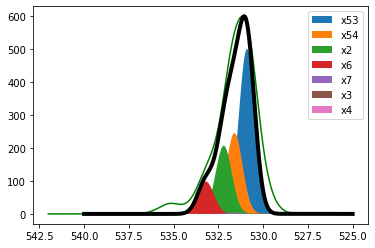

Const: 5 Multiplier: 5


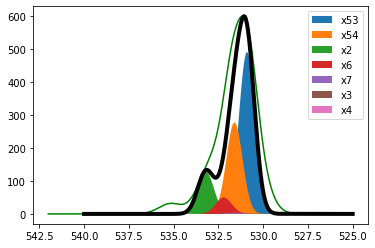

Const: 5 Multiplier: 10


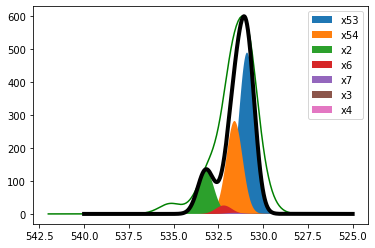

Const: 6 Multiplier: 0.1


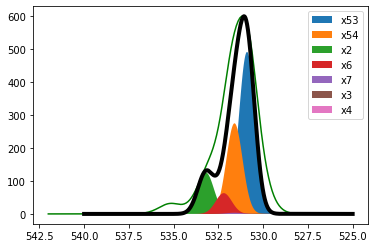

Const: 6 Multiplier: 0.5


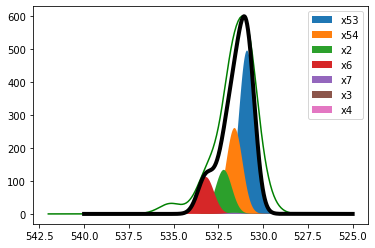

Const: 6 Multiplier: 1


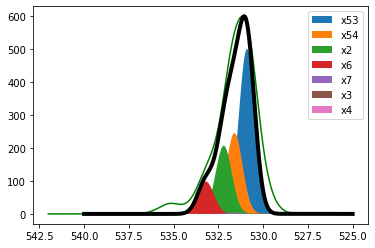

Const: 6 Multiplier: 5


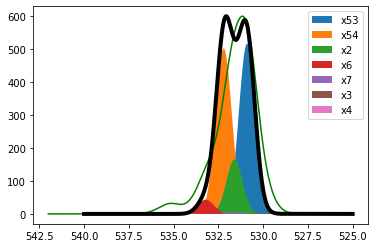

Const: 6 Multiplier: 10


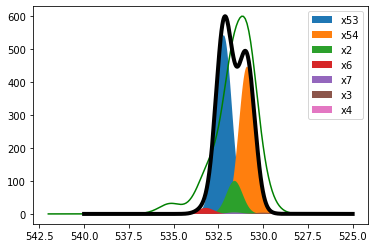

Const: 7 Multiplier: 0.1


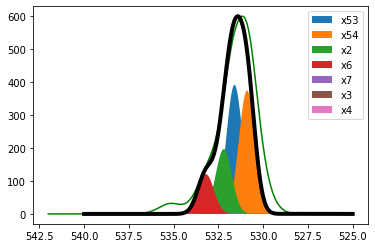

Const: 7 Multiplier: 0.5


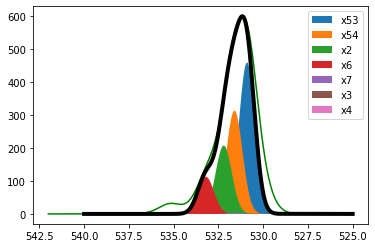

Const: 7 Multiplier: 1


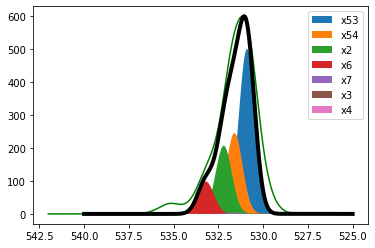

Const: 7 Multiplier: 5


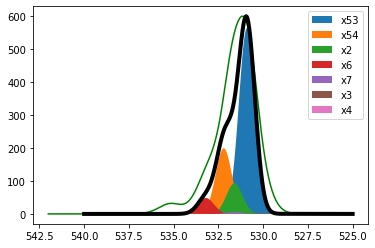

Const: 7 Multiplier: 10


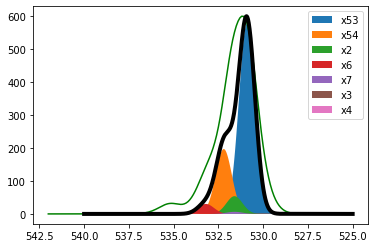

Const: 8 Multiplier: 0.1


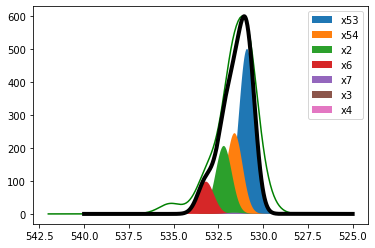

Const: 8 Multiplier: 0.5


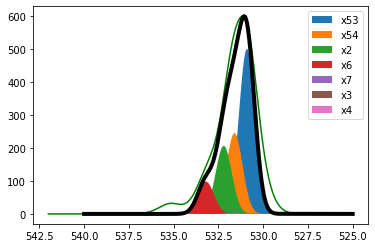

Const: 8 Multiplier: 1


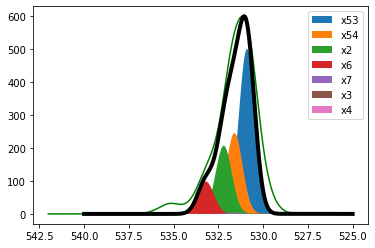

Const: 8 Multiplier: 5


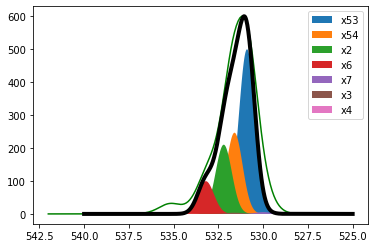

Const: 8 Multiplier: 10


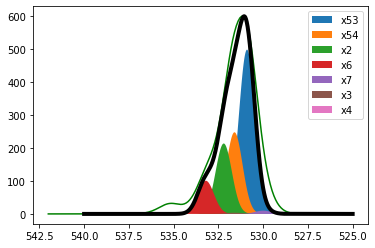

Const: 9 Multiplier: 0.1


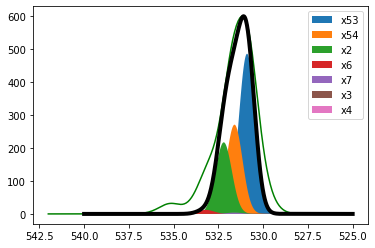

Const: 9 Multiplier: 0.5


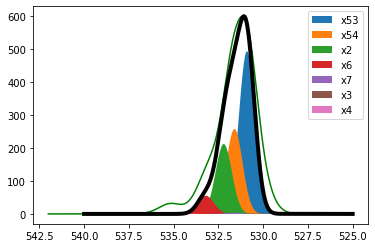

Const: 9 Multiplier: 1


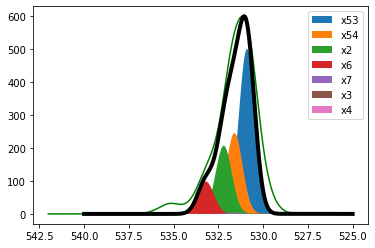

Const: 9 Multiplier: 5


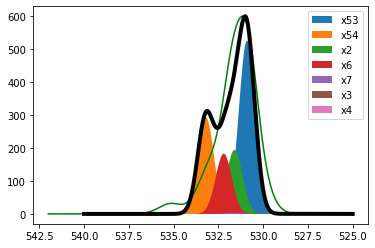

Const: 9 Multiplier: 10


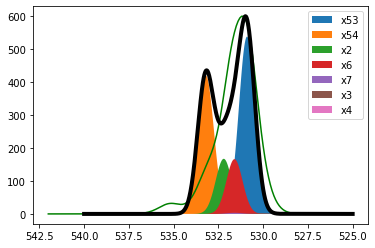

Const: 10 Multiplier: 0.1


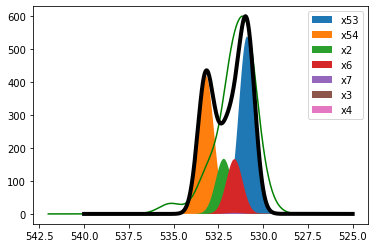

Const: 10 Multiplier: 0.5


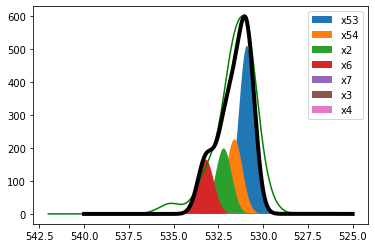

Const: 10 Multiplier: 1


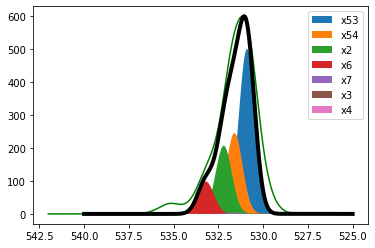

Const: 10 Multiplier: 5


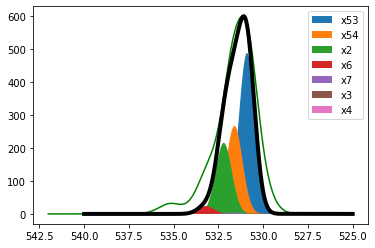

Const: 10 Multiplier: 10


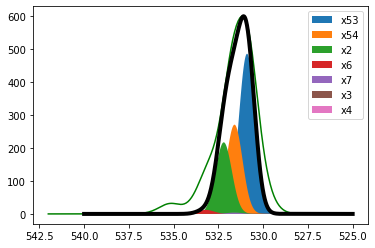

Const: 11 Multiplier: 0.1


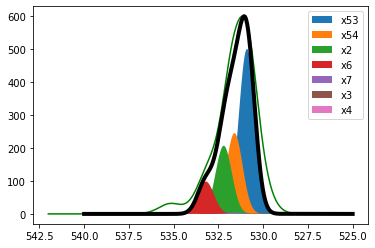

Const: 11 Multiplier: 0.5


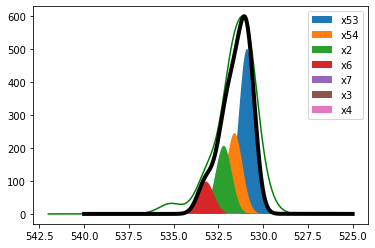

Const: 11 Multiplier: 1


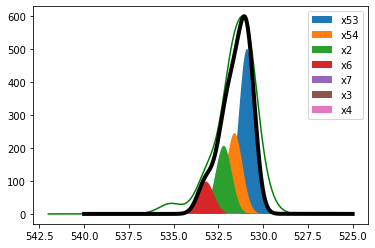

Const: 11 Multiplier: 5


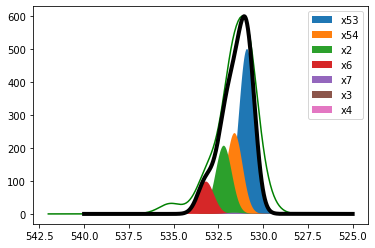

Const: 11 Multiplier: 10


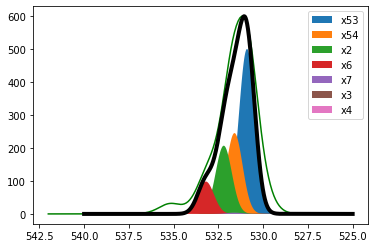

In [13]:
x = read_new_data('../data/1e-6_rt.txt')
j = 0
for i, s in enumerate(sols):
    print('Const: '+str(int(i / len(multipliers)))+' Multiplier: '+str(multipliers[j]))
    j += 1
    j = j % len(multipliers)
    
    s.set_experimental(x[0])
    s.plot_gaussian(envelope=True, overlay=True, ignore=[y1])

In [10]:
import pickle
with open('../nickel_consts.pkl', 'wb') as f:
    pickle.dump(sols, f)

In [3]:
sols = pickle.load(open('../data/nickel_consts.pkl', 'rb'))

In [4]:
for s in sols:
    s.ignore = [y1]
    s.process()

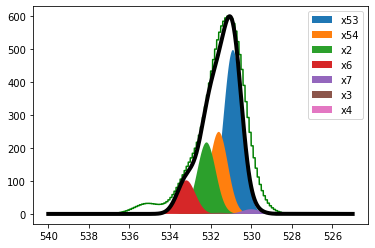

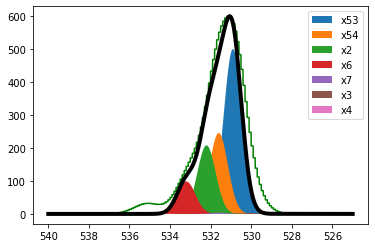

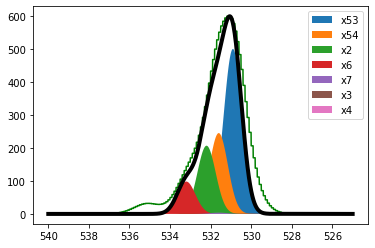

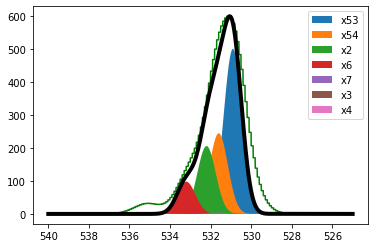

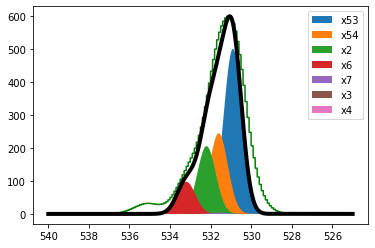

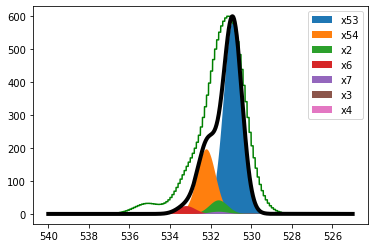

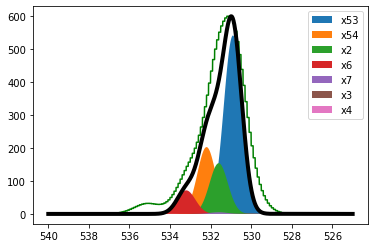

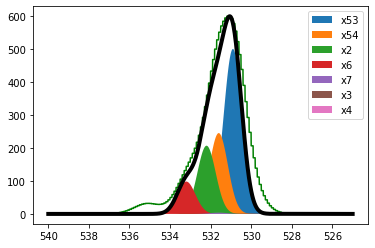

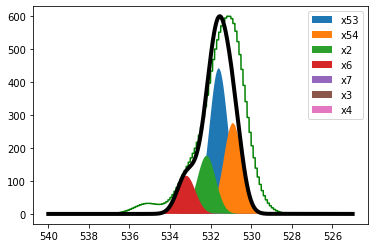

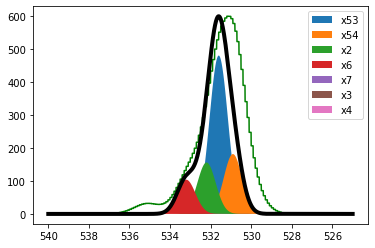

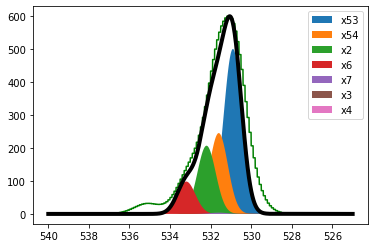

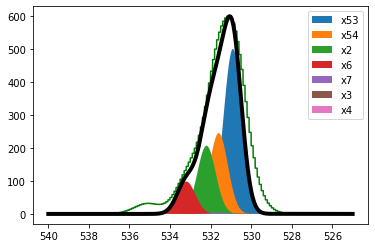

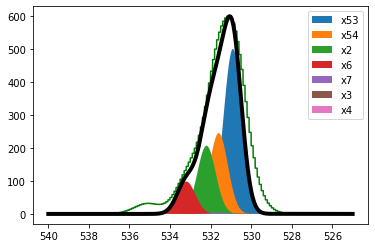

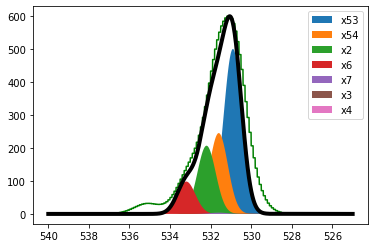

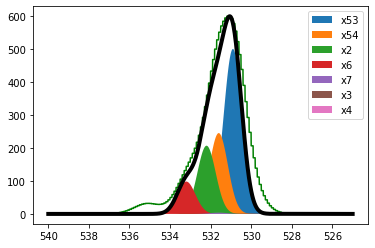

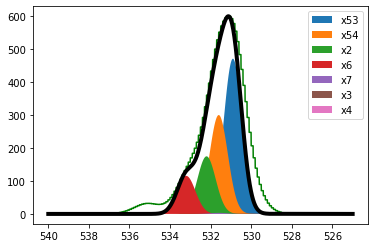

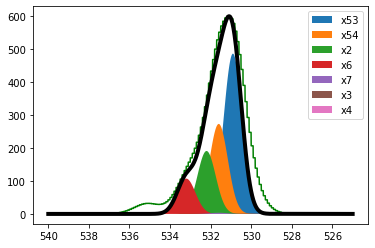

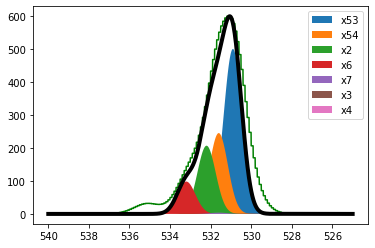

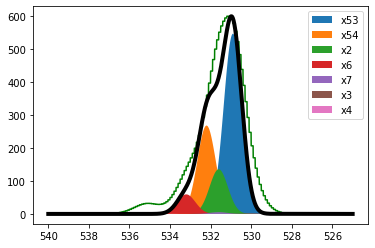

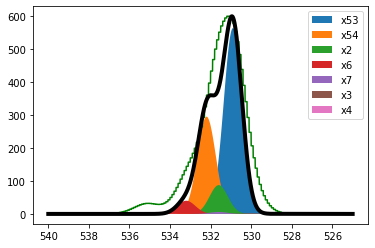

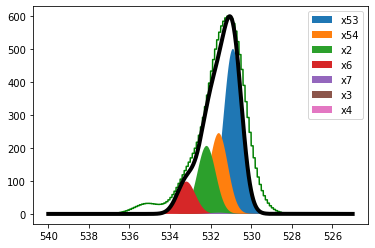

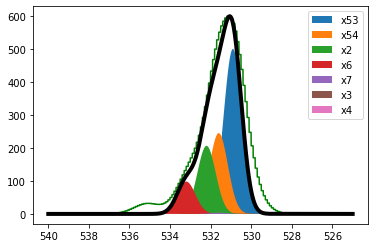

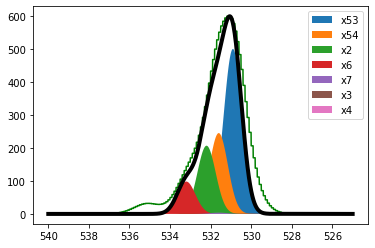

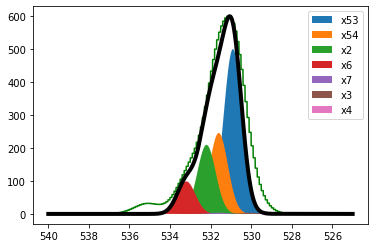

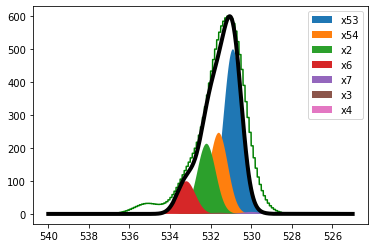

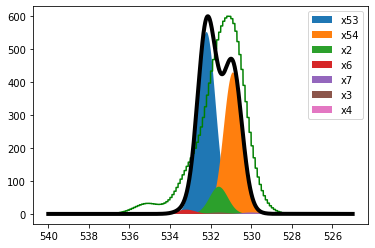

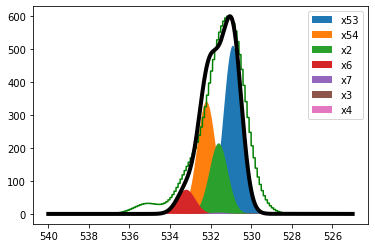

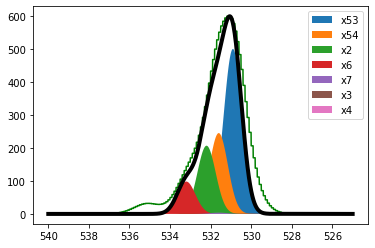

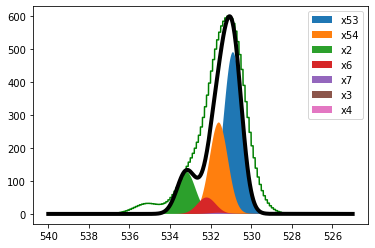

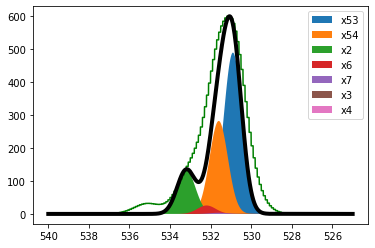

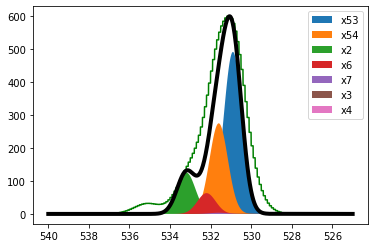

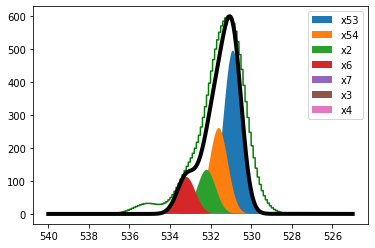

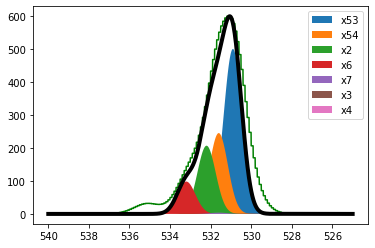

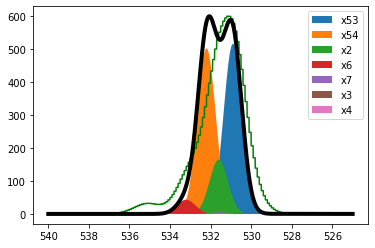

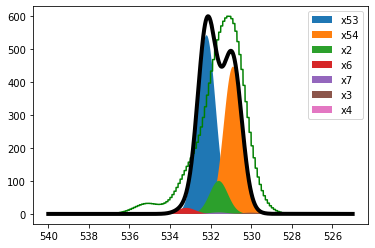

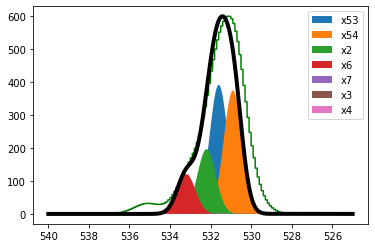

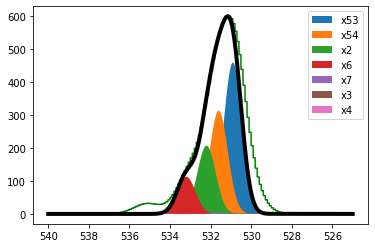

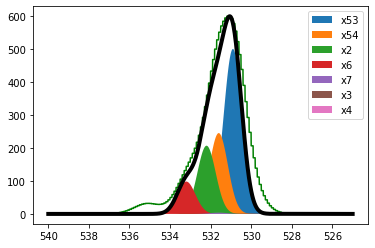

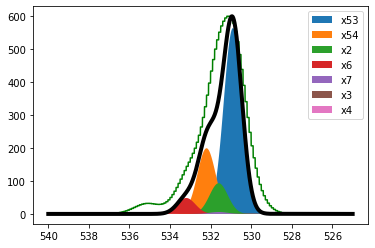

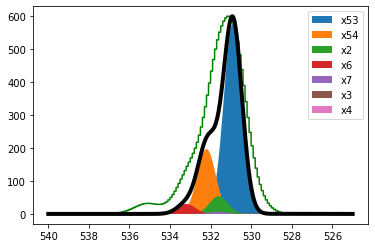

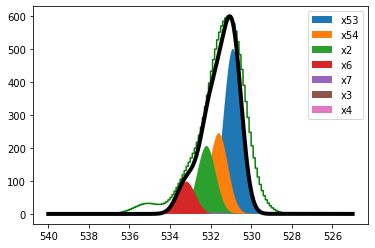

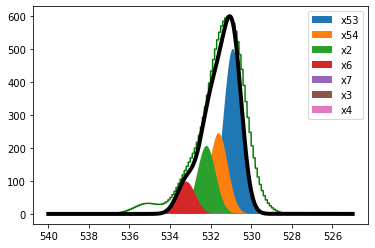

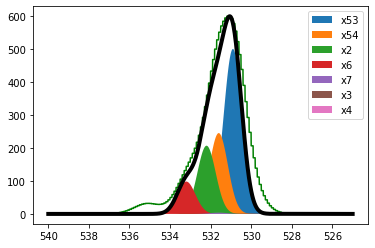

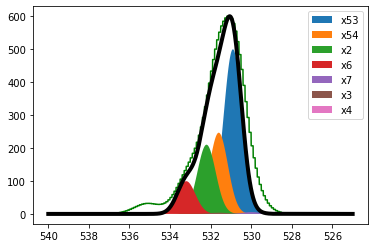

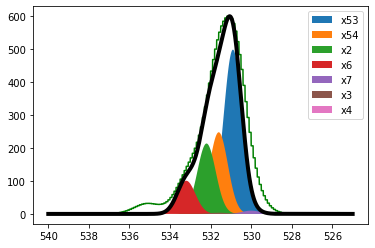

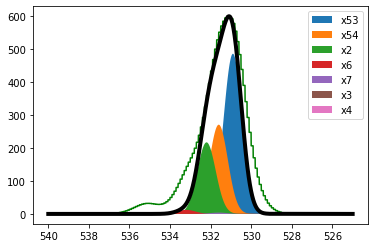

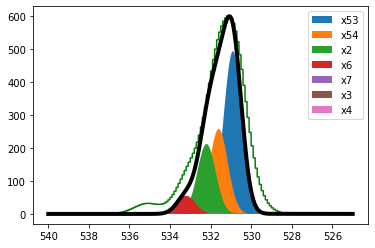

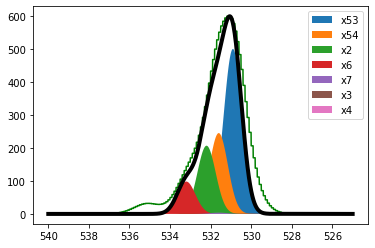

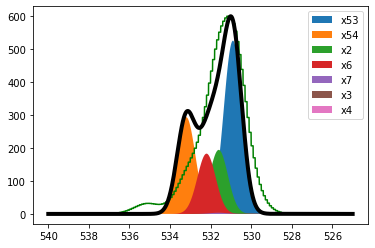

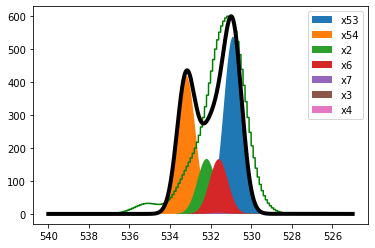

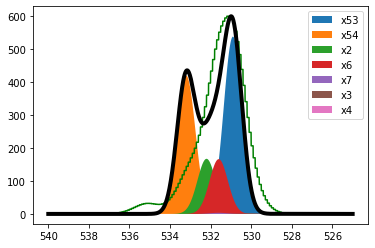

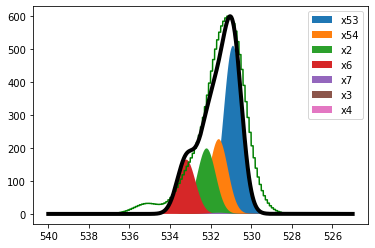

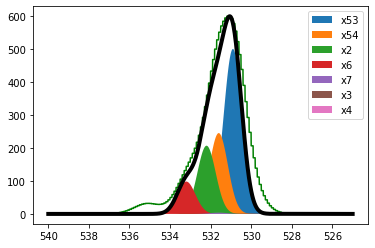

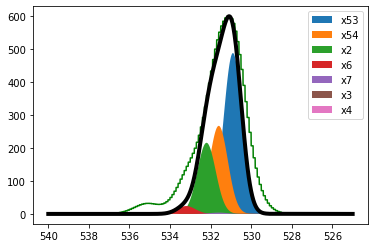

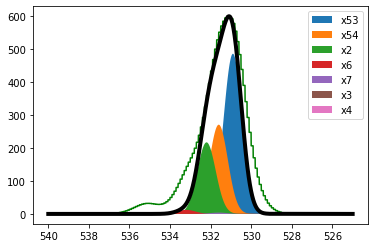

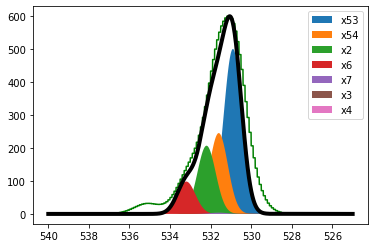

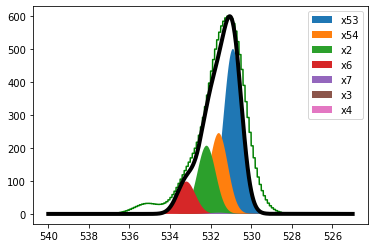

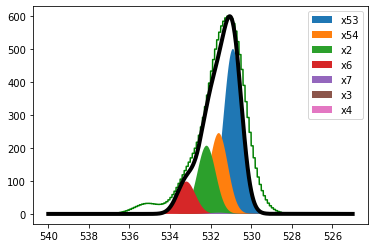

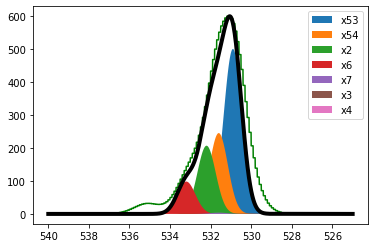

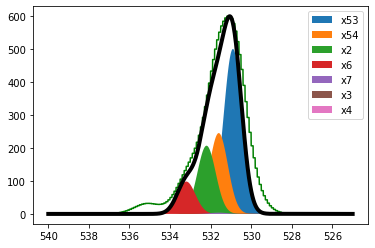

In [5]:
for i in range(len(sols)):
    sols[i].plot_gaussian(envelope=True, resample_envelope=True, overlay=True)

In [1]:
rei = []
self = sols[0]
i = 0
bes = self.binding_energies
for intensity, be in zip(list(reversed(self.xps.intensity)), list(reversed(self.xps.binding_energy))):
    while i < len(bes) and be > bes[i]:
        rei.append(intensity)
        i += 1
    if i >= len(bes):
        break

print(len(rei))

NameError: name 'sols' is not defined

In [6]:
rmses_list = []
for i in range(12):
    rmses_list.append([])
    for j in range(5):
        rmses_list[i].append(sols[i*5 + j].rmse())
rmses = pd.DataFrame(rmses_list, columns=['0.1', '0.5', '1', '5', '10'])
rmses

,0.1,0.5,1,5,10
0,38.248311,41.036452,41.419971,41.732864,41.772157
1,67.277771,48.626247,41.419971,66.725167,82.082182
2,41.420130,41.420222,41.420222,41.420149,41.419967
3,42.530456,41.711077,41.419967,45.148267,48.822064
4,41.551268,41.492976,41.419967,40.848863,40.161955
5,76.648528,44.071599,41.419967,56.203037,59.595217
6,54.451699,46.416968,41.419967,62.504208,73.016690
7,52.611585,42.666537,41.419967,57.653193,64.808562
8,41.648628,41.546338,41.419967,40.440084,39.288747
9,48.556050,44.006101,41.419967,56.830438,79.649000


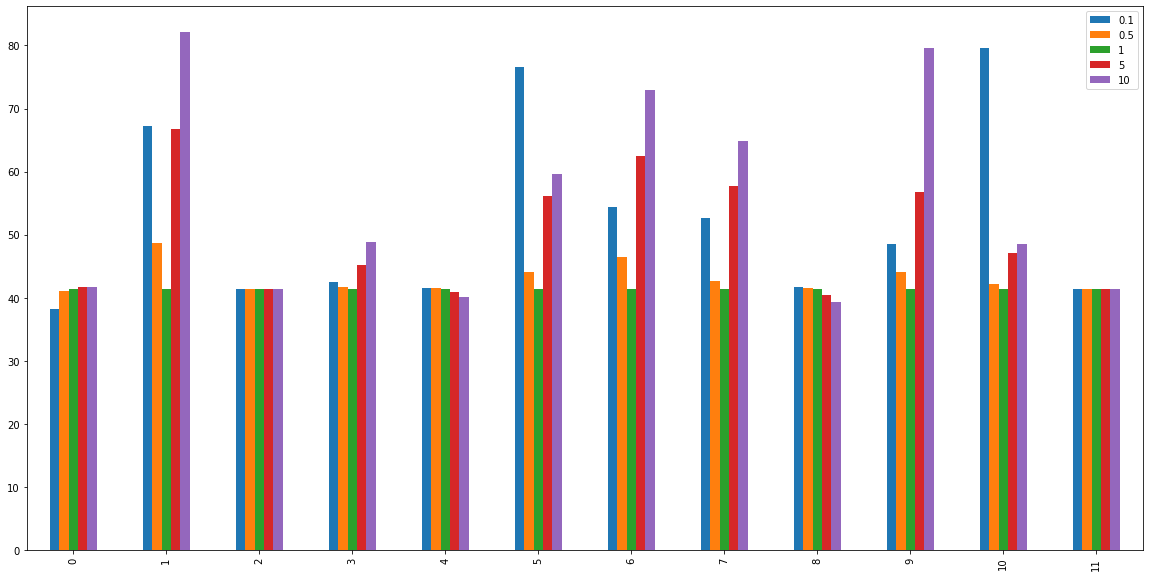

In [7]:
rmses.plot.bar(figsize=(20,10))

In [8]:
rmses_min = rmses.agg(['min', 'idxmin']).T
rmses_min

,min,idxmin
0.1,38.248311,0.0
0.5,41.036452,0.0
1,41.419967,3.0
5,40.440084,8.0
10,39.288747,8.0


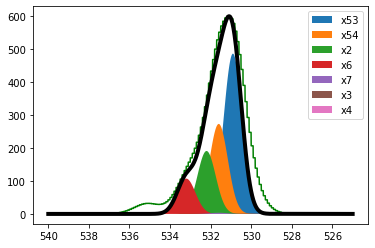

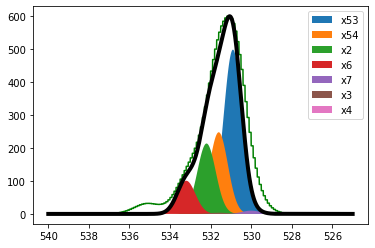

In [10]:
sols[16].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
sols[44].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)

In [11]:
integrals_list = []
for i in range(12):
    integrals_list.append([])
    for j in range(5):
        integrals_list[i].append(sols[i*5 + j].integral_diff())
integral_diffs = pd.DataFrame(integrals_list, columns=['0.1', '0.5', '1', '5', '10'])
integral_diffs

,0.1,0.5,1,5,10
0,292.330435,318.879747,322.444258,325.340753,325.705150
1,553.793083,412.831889,322.444258,373.281510,472.561236
2,322.444662,322.444896,322.444896,322.444711,322.444249
3,311.814511,315.655602,322.444249,367.004881,392.285821
4,323.750019,323.169400,322.444249,316.710306,309.693138
5,289.560303,222.227439,322.444249,441.155595,459.626125
6,431.150456,377.659202,322.444249,122.197926,255.427961
7,288.206772,276.134467,322.444249,484.743289,536.395462
8,324.561687,323.617106,322.444249,313.289450,302.372418
9,395.380032,358.931525,322.444249,158.618817,51.929679


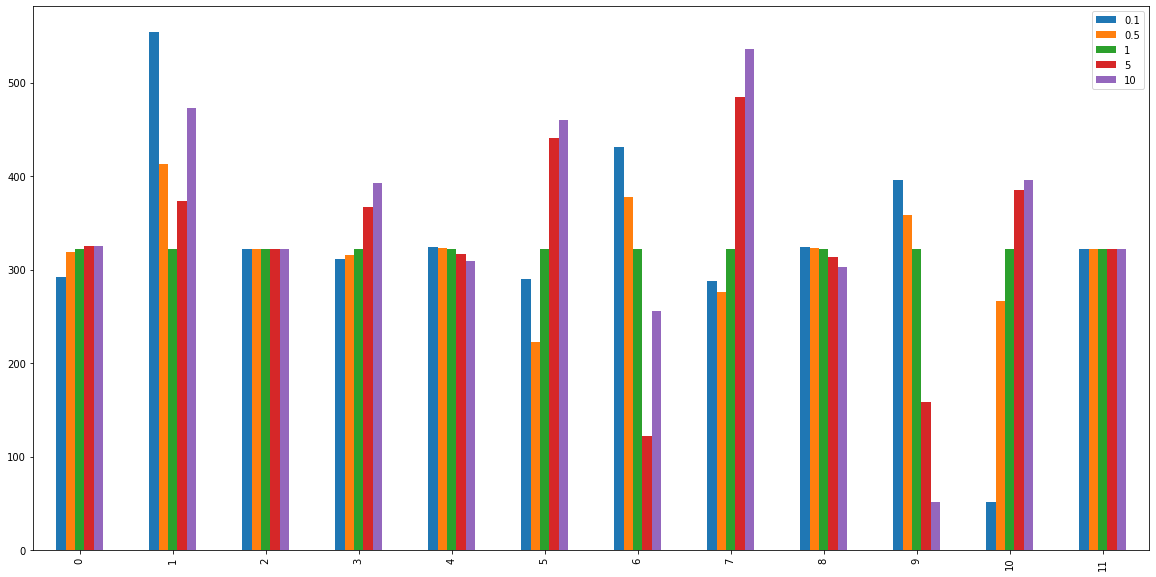

In [12]:
integral_diffs.plot.bar(figsize=(20,10))

In [13]:
integral_diffs_min = integral_diffs.agg(['min', 'idxmin']).T
integral_diffs_min

,min,idxmin
0.1,51.928913,10.0
0.5,222.227439,5.0
1,322.444249,3.0
5,122.197926,6.0
10,51.929679,9.0


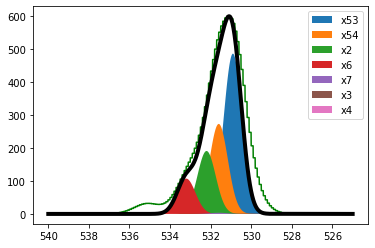

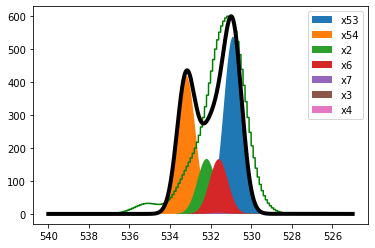

In [14]:
sols[16].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
sols[49].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)